In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/placement.csv" )
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: ylabel='Density'>

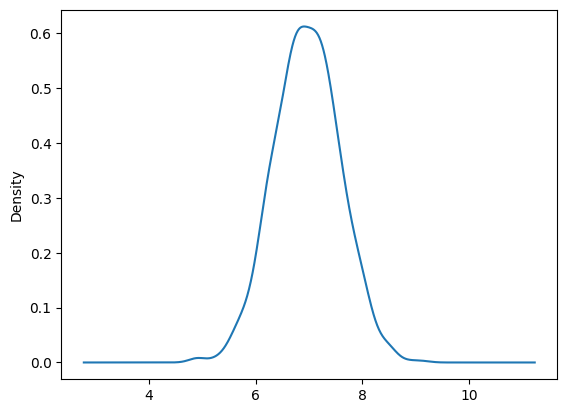

In [5]:
df["cgpa"].plot(kind = "kde")

<ipython-input-8-e2b4c2324d7c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["placement_exam_marks"])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

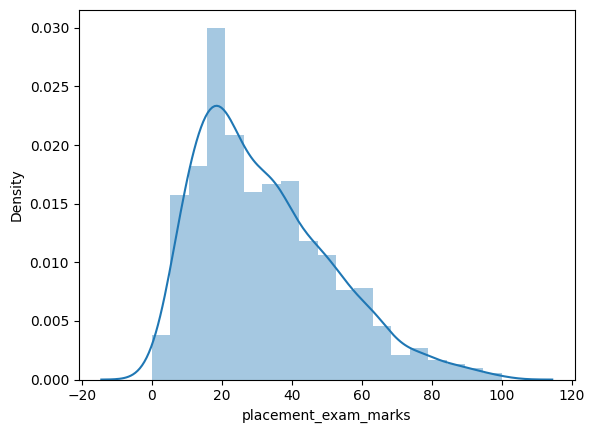

In [8]:
sns.distplot(df["placement_exam_marks"])

In [11]:
df["placement_exam_marks"].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


In [9]:
df["placement_exam_marks"].quantile(0.25)

17.0

In [10]:
df["placement_exam_marks"].quantile(0.75)

44.0

In [12]:
Q1 = df["placement_exam_marks"].quantile(0.25)
Q3 = df["placement_exam_marks"].quantile(0.75)
IQR = Q3- Q1
IQR

27.0

In [14]:
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print("Upper Limit : ",upper_limit)
print("Lower Limit : ",lower_limit)

Upper Limit :  84.5
Lower Limit :  -23.5


# **Trimming **

In [15]:
df[df["placement_exam_marks"] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [16]:
df[df["placement_exam_marks"] < lower_limit]

,cgpa,placement_exam_marks,placed


In [18]:
df["placement_exam_marks"].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


In [17]:
trimmed_df = df[(df["placement_exam_marks"] <= upper_limit) & (df["placement_exam_marks"] >= lower_limit)]
trimmed_df["placement_exam_marks"].describe()

,placement_exam_marks
count,985.000000
mean,31.339086
std,17.857633
min,0.000000
25%,17.000000
50%,28.000000
75%,43.000000
max,83.000000


<Axes: ylabel='placement_exam_marks'>

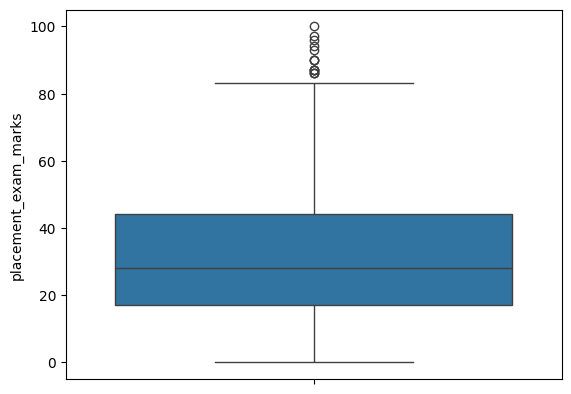

In [20]:
sns.boxplot(df["placement_exam_marks"])

<Axes: ylabel='placement_exam_marks'>

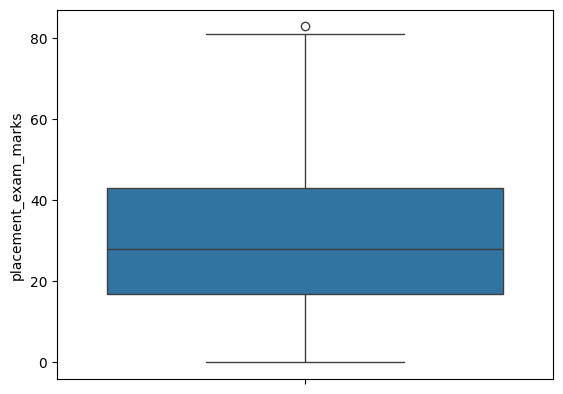

In [21]:
sns.boxplot(trimmed_df["placement_exam_marks"])

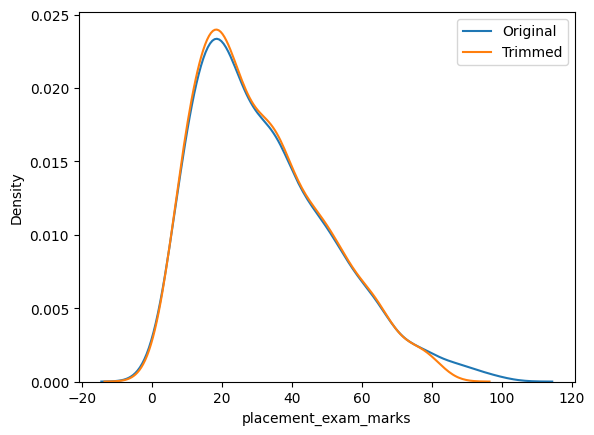

In [24]:
sns.kdeplot(df["placement_exam_marks"] , label = "Original")
sns.kdeplot(trimmed_df["placement_exam_marks"] , label = "Trimmed")
plt.legend()

# **Capping**

In [29]:
capped_df = df.copy()
capped_df["placement_exam_marks"] = np.where(df["placement_exam_marks"] > upper_limit , upper_limit,
                                             np.where(df["placement_exam_marks"] < lower_limit , lower_limit,
                                                      df["placement_exam_marks"]))

In [31]:
capped_df["placement_exam_marks"].describe()

,placement_exam_marks
count,1000.000000
mean,32.136500
std,18.865419
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,84.500000


<Axes: ylabel='placement_exam_marks'>

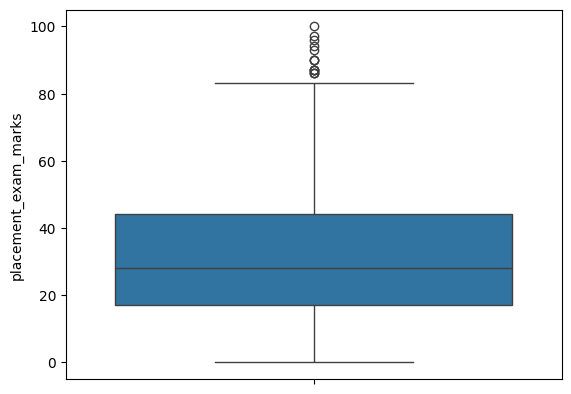

In [32]:
sns.boxplot(df["placement_exam_marks"])

<Axes: ylabel='placement_exam_marks'>

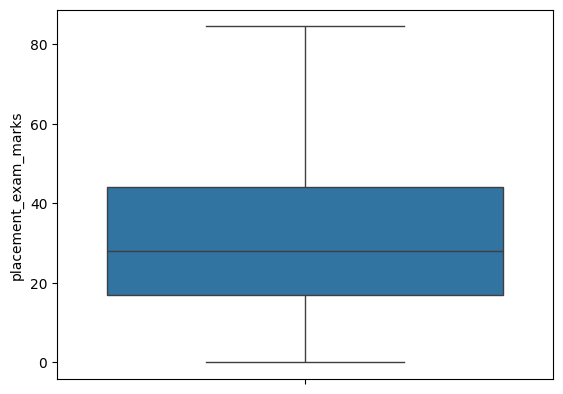

In [33]:
sns.boxplot(capped_df["placement_exam_marks"])

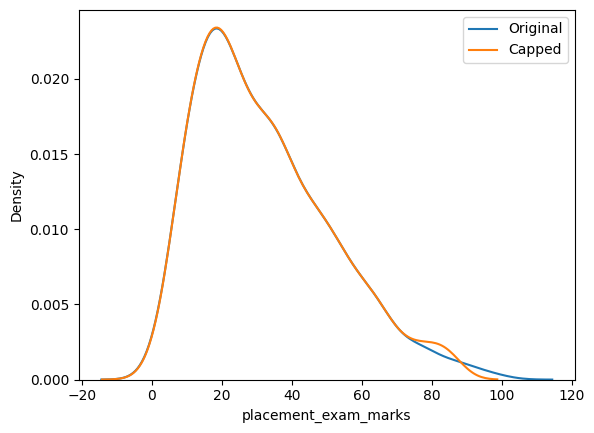

In [34]:
sns.kdeplot(df["placement_exam_marks"] , label = "Original")
sns.kdeplot(capped_df["placement_exam_marks"] , label = "Capped")
plt.legend()